## Predicting and Analyzing Heart Disease with Machine Learning
This project is the capstone assignment for the spring 2019 Data Science course hosted by LaunchCode. It aims to model and predict the presence of heart disease in patients by using binary classification machine learning algorithms (random forest, k-nearest neighbors, logistic regression, Naive Bayes) and a dataset of patient information, which can be found on Kaggle and UC Irvine's Machine Learning Repository

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")
import seaborn as sns
import scipy

In [42]:
heart=pd.read_csv("heart.csv")

In [43]:
heart.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


### Heart disease data set attribute information¶
<ol>
<li>age</li>
<li>sex (1= male; 0=female)</li>
<li>chest pain type (4 values)</li>
<li>resting blood pressure</li>
<li>serum cholestoral in mg/dl</li>
<li>fasting blood sugar > 120 mg/dl</li>
<li>resting electrocardiographic results (values 0,1,2)</li>
<li>maximum heart rate achieved</li>
<li>exercise induced angina</li>
<li>oldpeak = ST depression induced by exercise relative to rest</li>
<li>the slope of the peak exercise ST segment</li>
<li>number of major vessels (0-3) colored by flourosopy</li>
<li>thal: 3 = normal; 6 = fixed defect; 7 = reversable defect (thallium heart scan or stress test)</li>
<li>target (0 = no heart disease; 1 = heart disease)</li>
</ol>

### Rename columns so things make sense to my brain

In [65]:
heart = heart.rename(columns={"cp": "chest_pain", "trestbps": "blood_pressure", "fbs": "blood_sugar", "ca": "vessels", "chol": "cholesterol"})

In [71]:
heart['health_status'] = heart['output']

In [67]:
heart['health_status'] = ["healthy" if x == 0 else "sick" for x in heart['health_status']]

In [68]:
heart['gender'] = heart['sex']

In [69]:
heart['gender'] = ['F' if x == 0 else 'M' for x in heart['gender']]

In [72]:
heart.head()

,age,sex,chest_pain,trtbps,cholesterol,blood_sugar,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,health_status,gender
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,M
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1,M
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1,F
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1,M
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,F


In [50]:
heart.shape

(303, 16)

In [51]:
heart.describe()

,age,sex,chest_pain,trtbps,cholesterol,blood_sugar,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [52]:
heart.dtypes

age                int64
sex                int64
chest_pain         int64
trtbps             int64
cholesterol        int64
blood_sugar        int64
restecg            int64
thalachh           int64
exng               int64
oldpeak          float64
slp                int64
caa                int64
thall              int64
output             int64
health_status     object
gender            object
dtype: object

In [53]:
heart[heart.duplicated(keep=False)]

,age,sex,chest_pain,trtbps,cholesterol,blood_sugar,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,health_status,gender
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1,sick,M
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1,sick,M


#### Drop duplicates

In [54]:
heart = heart.drop_duplicates(keep='first')

#### Find out how many people do and don't exhibit heart disease

In [55]:
heart['health_status'].value_counts()

sick       164
healthy    138
Name: health_status, dtype: int64

### Get an overview distribution of each column

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'chest_pain'}>,
        <AxesSubplot:title={'center':'trtbps'}>],
       [<AxesSubplot:title={'center':'cholesterol'}>,
        <AxesSubplot:title={'center':'blood_sugar'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalachh'}>],
       [<AxesSubplot:title={'center':'exng'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slp'}>,
        <AxesSubplot:title={'center':'caa'}>],
       [<AxesSubplot:title={'center':'thall'}>,
        <AxesSubplot:title={'center':'output'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

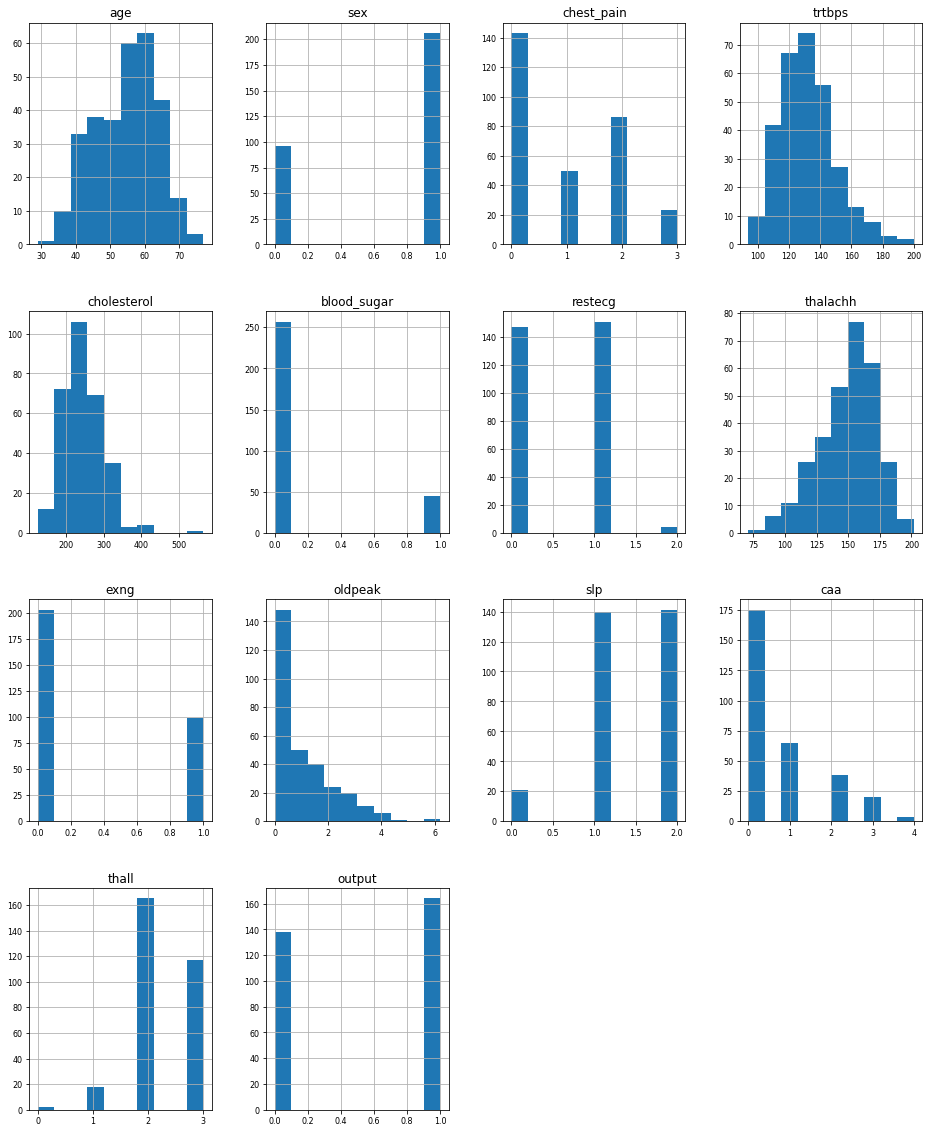

In [56]:
#heart.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
# add bins ^^^

heart.hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8)

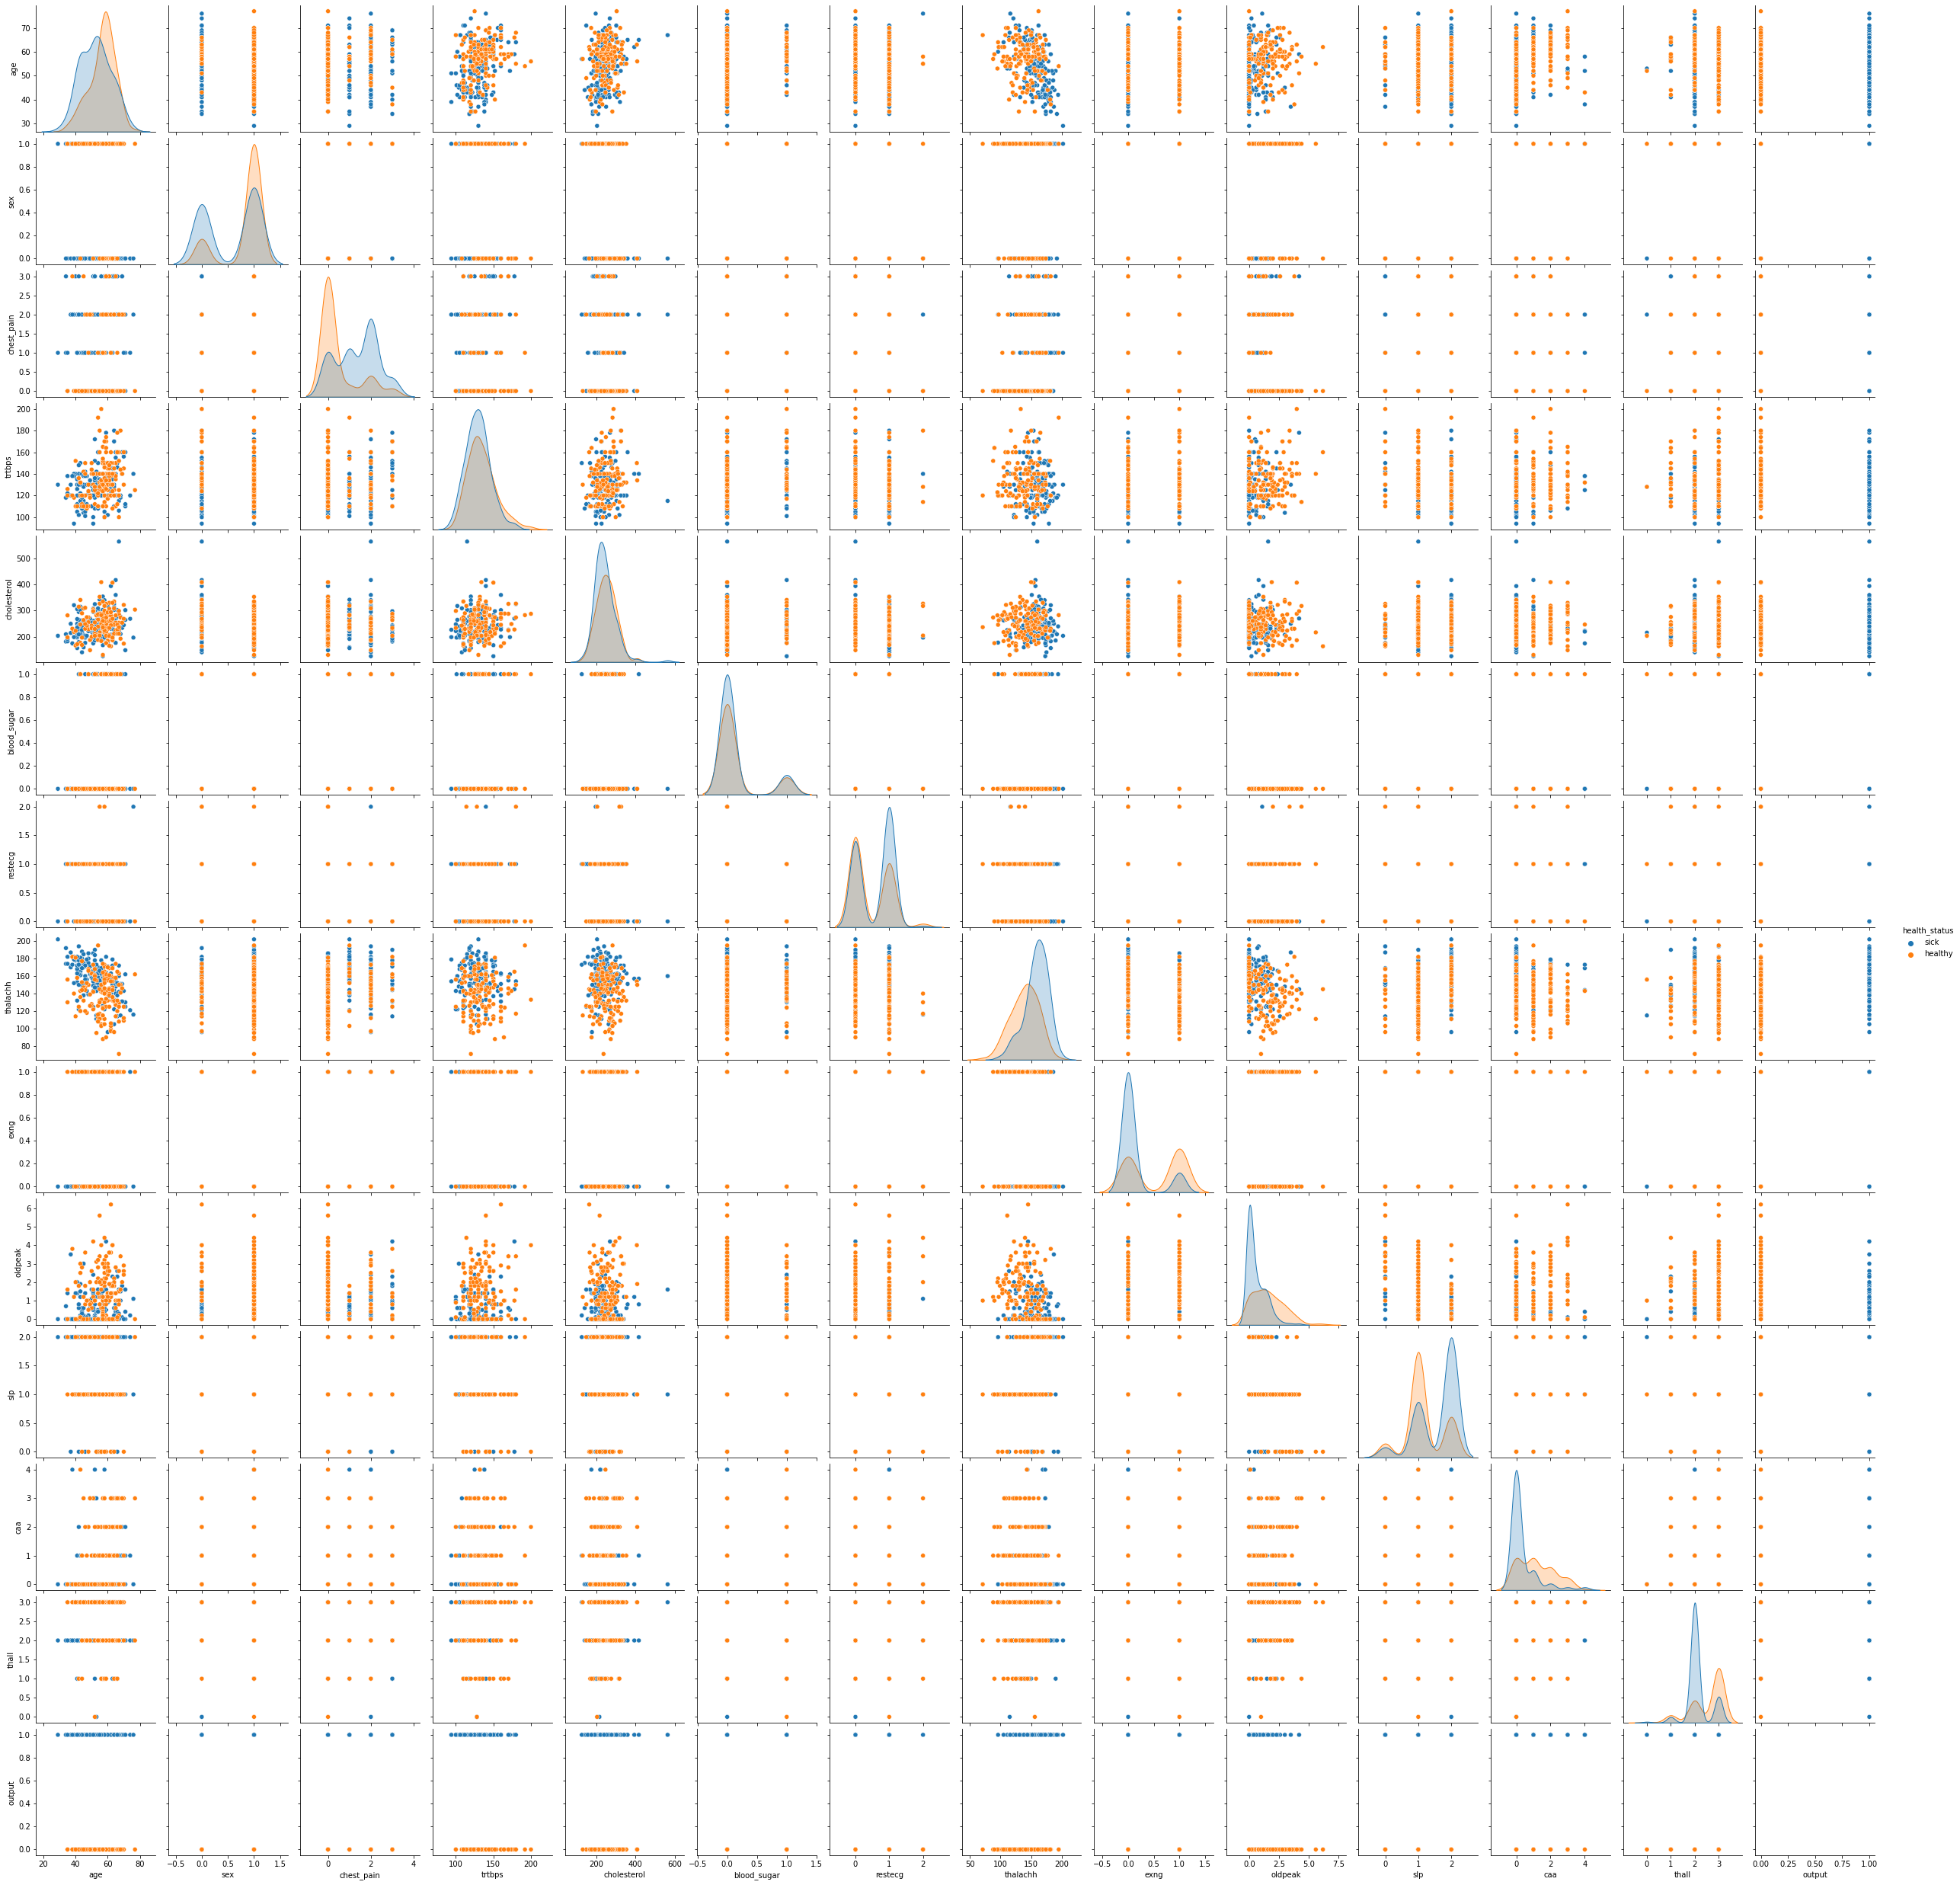

In [57]:
sns.pairplot(heart, hue='health_status')

### Create a correlation heatmap

In [58]:
heart.corr()

,age,sex,chest_pain,trtbps,cholesterol,blood_sugar,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
chest_pain,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
cholesterol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
blood_sugar,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<AxesSubplot:>

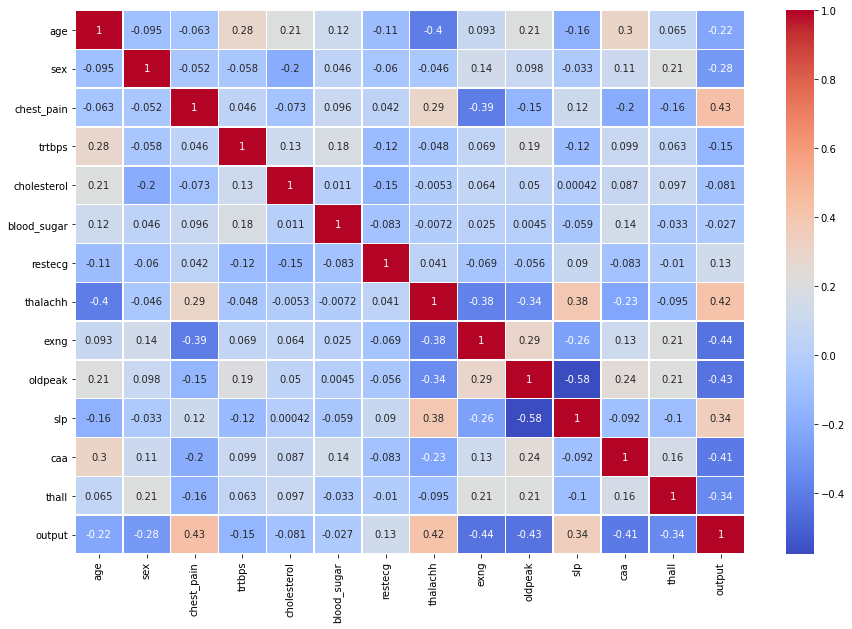

In [59]:
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(heart.corr(),annot=True,cmap='coolwarm',linewidths=.5)

### Zoom in on individual variables and correlations with target
#### There are twice as many men in the data set

In [60]:
heart['gender'].value_counts()

M    206
F     96
Name: gender, dtype: int64

#### Distribution of heart disease between men and women

In [61]:
heart.groupby(['gender', 'health_status'])['gender'].count()

gender  health_status
F       healthy           24
        sick              72
M       healthy          114
        sick              92
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

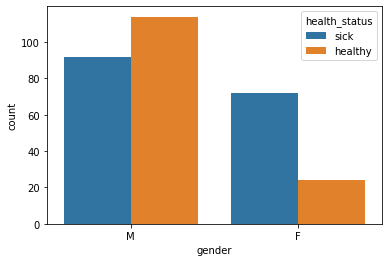

In [62]:
sns.countplot(data=heart, x='gender', hue='health_status')

### Distribution of heart disease between categories of chest pain

It seems like category 0 might be correlated with the absence of heart disease.

<AxesSubplot:xlabel='chest_pain', ylabel='count'>

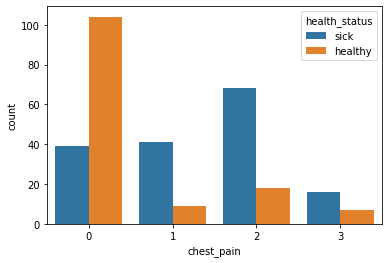

In [63]:
sns.countplot(data=heart, x='chest_pain', hue='health_status')

In [73]:
heart['chest_pain'].corr(heart['output'])

0.43207959156640685

### Distribution of heart disease between categories of slope

It seems like category 2 might be correlated with heart disease

<AxesSubplot:xlabel='slp', ylabel='count'>

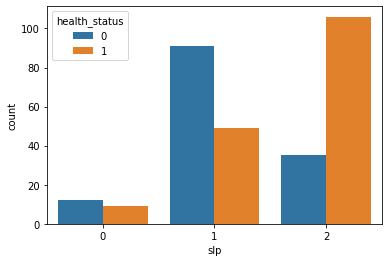

In [75]:
sns.countplot(data=heart, x='slp', hue='health_status')

In [77]:
heart['slp'].corr(heart['output'])

0.34393953248938663

#### Distribution of heart disease with thalach

<AxesSubplot:xlabel='thalachh', ylabel='Density'>

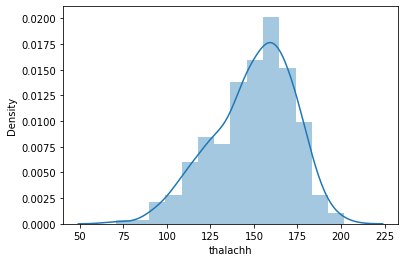

In [79]:
sns.distplot(heart['thalachh'])

<AxesSubplot:xlabel='thalachh', ylabel='count'>

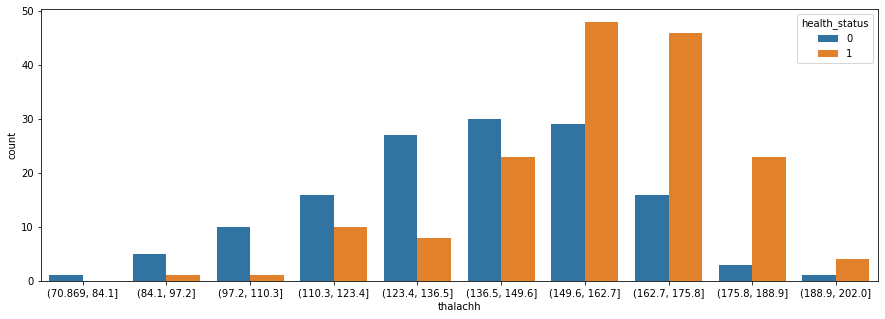

In [81]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=heart, x=pd.cut(heart['thalachh'], 10), hue='health_status')

In [82]:
heart['thalachh'].corr(heart['output'])

0.4199550436638696

#### Distribution of heart disease between categories of thal

It seems like category 2 might be correlated with heart disease

<AxesSubplot:xlabel='thall', ylabel='count'>

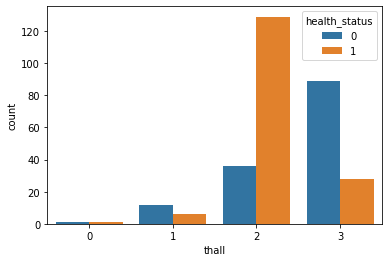

In [84]:
sns.countplot(data=heart, x='thall', hue='health_status')

In [87]:
heart['thall'].corr(heart['output'])

-0.3431007123895648

#### Distribution of heart disease between number of heart vessels colored by flourosopy

It seems like 0 vessels colored might be correlated with heart disease

<AxesSubplot:xlabel='caa', ylabel='count'>

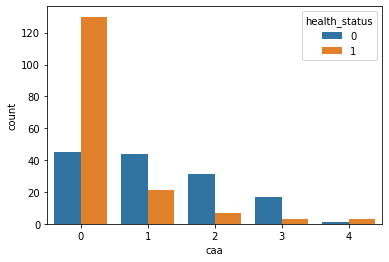

In [89]:
sns.countplot(data=heart, x='caa', hue='health_status')

In [90]:
heart['caa'].corr(heart['output'])

-0.4089919797569272

#### Distribution of heart disease with oldpeak levels (binned)

It seems like 0-1 range might be correlated with heart disease Very similar distribution to vessels above

<AxesSubplot:xlabel='oldpeak', ylabel='count'>

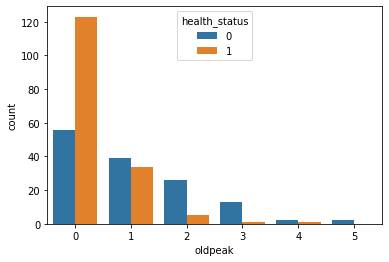

In [91]:
#bin oldpeak with pd.cut

sns.countplot(data=heart, x=pd.cut(heart['oldpeak'], 6, labels=[0,1,2,3,4,5]), hue='health_status')

In [92]:
heart['oldpeak'].corr(heart['output'])

-0.42914583288673747

In [94]:
heart['oldpeak'].corr(heart['caa'])

0.23656044177478658

<AxesSubplot:xlabel='oldpeak', ylabel='Density'>

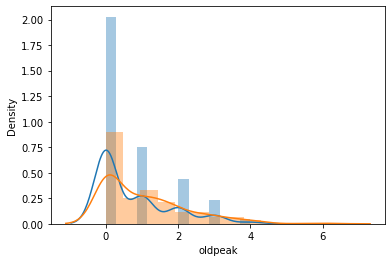

In [96]:
sns.distplot(heart['caa'])
sns.distplot(heart['oldpeak'])

#### Distribution of age

In [97]:
heart['age'].describe()

count    302.00000
mean      54.42053
std        9.04797
min       29.00000
25%       48.00000
50%       55.50000
75%       61.00000
max       77.00000
Name: age, dtype: float64

In [98]:
heart['age'].mean()

54.420529801324506

<AxesSubplot:xlabel='age', ylabel='Density'>

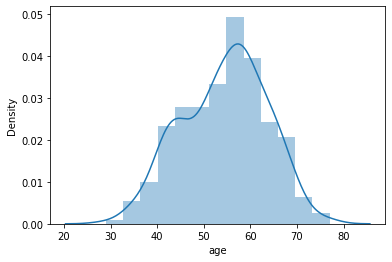

In [99]:
sns.distplot(heart['age'])

<AxesSubplot:xlabel='trtbps', ylabel='Density'>

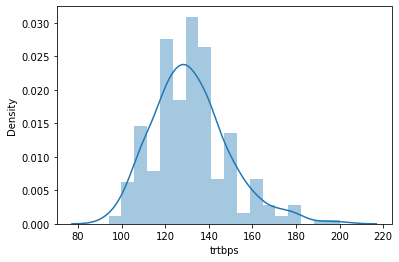

In [101]:
sns.distplot(heart['trtbps'])

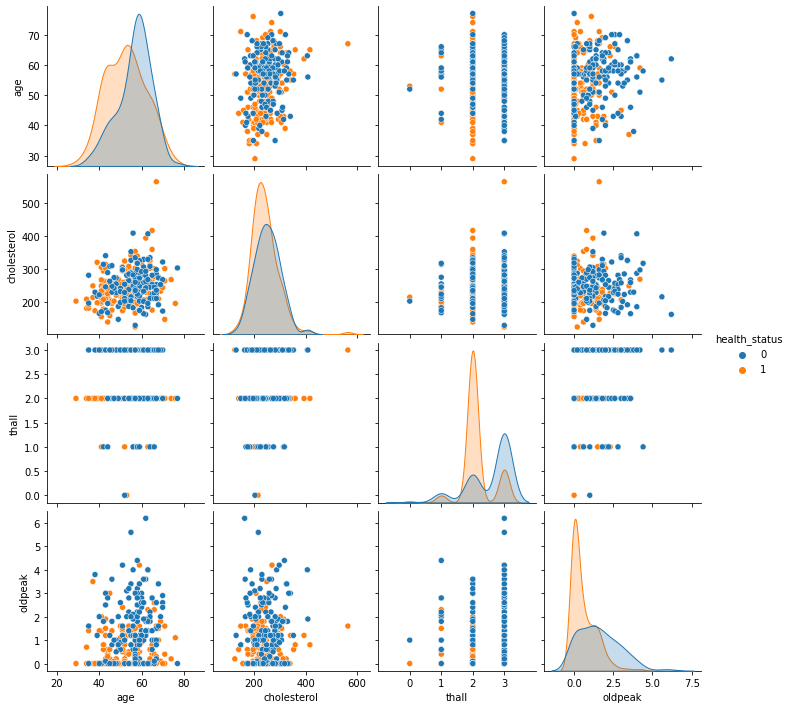

In [106]:
sns.pairplot(heart , vars = ['age', 'cholesterol', 'thall', 'oldpeak'], hue='health_status')

### Modeling

In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import eli5
from eli5.sklearn import PermutationImportance
import warnings
warnings.filterwarnings('ignore')

#### Scale features

In [115]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trtbps', 'cholesterol', 'thalachh', 'oldpeak']
heart[columns_to_scale] = standardScaler.fit_transform(heart[columns_to_scale])

#### One-hot encode categorical features

In [118]:
heart = pd.get_dummies(heart, columns = ['sex', 'chest_pain', 'blood_sugar', 'restecg', 'exng', 'slp', 'thall'], drop_first=True)

#### Separate features from target labels (healthy or sick)

In [124]:
heart = heart.drop(['gender'], axis =1 )
labels = heart['output']
features = heart.drop(['output'], axis = 1)


#### Split features and target labels into a training set and a test set

In [125]:
features_train , features_test, labels_train, labels_test = train_test_split(features, labels, test_size= 0.2, random_state=42)

### Random Forest
Find the optimal number of decision trees for the Random Forest model (from a list of options)

[0.8524590163934426, 0.9672131147540983, 0.9672131147540983, 0.9672131147540983, 0.9672131147540983, 0.9672131147540983, 0.9672131147540983, 0.9672131147540983]


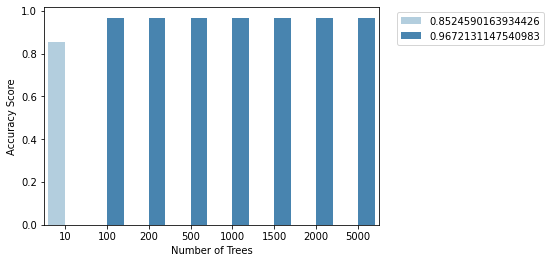

In [126]:
randomForest_scores = []
trees = [10, 100, 200, 500, 1000, 1500, 2000, 5000]
for x in trees:
    randomForest = RandomForestClassifier(n_estimators = x, random_state = 1, max_depth=1)
    randomForest.fit(features_train, labels_train)
    randomForest_scores.append(randomForest.score(features_test, labels_test))
print(randomForest_scores)

sns.barplot(trees, randomForest_scores, hue=randomForest_scores, palette='Blues')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy Score')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

#### Find the optimal max_depth for the Random Forest model (from a list of options)

[0.9344262295081968, 1.0, 1.0, 1.0]


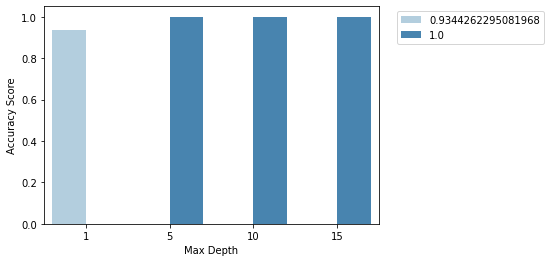

In [127]:
randomForest_scores = []
depth = [1, 5, 10, 15]
for x in depth:
    randomForest = RandomForestClassifier(n_estimators = 1000, random_state = 42, max_depth= x)
    randomForest.fit(features_train, labels_train)
    randomForest_scores.append(randomForest.score(features_test, labels_test))
print(randomForest_scores)

sns.barplot(depth, randomForest_scores, hue=randomForest_scores, palette='Blues')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

#### Instantiate model with 1000 decision trees and max depth of 1 (optimal numbers based on iterated experiments above)

In [128]:
randomForest = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_depth=1)

#### Train the model on features and labels training data

In [129]:
randomForest.fit(features_train, labels_train);

#### Test the model on features and labels test data to assess its accuracy

In [131]:
randomForest.score(features_test, labels_test)

score = round(randomForest.score(features_test,labels_test), 3) *100

print(f"Random Forest accuracy is {score}%")

Random Forest accuracy is 96.7%


#### Confusion matrix

Text(0.5, 1.0, 'Random Forest: Confusion Matrix')

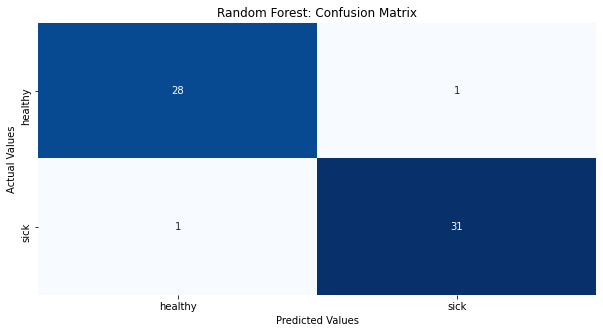

In [133]:
labels_predicted = randomForest.predict(features_test)
plt.subplots(figsize=(10,5))

conf_mat = confusion_matrix(labels_test, labels_predicted)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['healthy', 'sick'], yticklabels=['healthy', 'sick'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Random Forest: Confusion Matrix')

### K Nearest Neighbors

In [134]:
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(features_train, labels_train)
prediction = knn.predict(features_test)


score = round(knn.score(features_test, labels_test), 3) *100
print(f"K Nearest Neighbors accuracy is {score}%")

K Nearest Neighbors accuracy is 93.4%


#### Find the optimal k value (from 1-20)

Max K Nearest Neighbors Accuracy is 95.08%
Best K is 7


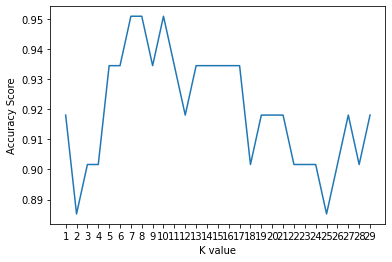

In [135]:
accuracyScores = []

for x in range(1,30):
    knn2 = KNeighborsClassifier(n_neighbors = x)
    knn2.fit(features_train, labels_train)
    accuracyScores.append(knn2.score(features_test, labels_test))
    
    
sns.lineplot(range(1,30), accuracyScores)
plt.xticks(np.arange(1,30,1))
plt.xlabel("K value")
plt.ylabel("Accuracy Score")


best_k = accuracyScores.index(max(accuracyScores)) + 1
max_score = round((max(accuracyScores) * 100), 2) 

print(f"Max K Nearest Neighbors Accuracy is {max_score}%")
print(f"Best K is {best_k}")

In [136]:
knn = KNeighborsClassifier(n_neighbors = 23)
knn.fit(features_train, labels_train)
prediction = knn.predict(features_test)


score = round(knn.score(features_test, labels_test), 3) *100
print(f"K Nearest Neighbors accuracy is {score}%")

K Nearest Neighbors accuracy is 90.2%


Text(0.5, 1.0, 'K Nearest Neighbors: Confusion Matrix')

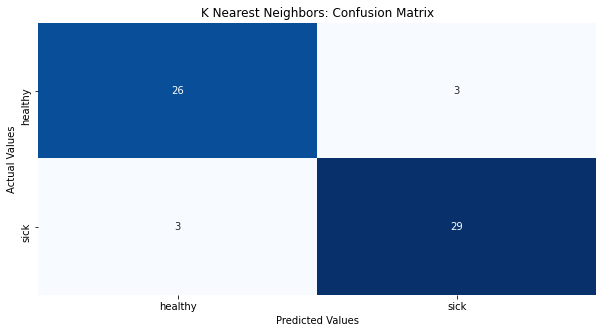

In [137]:
labels_predicted = knn.predict(features_test)
plt.subplots(figsize=(10,5))

conf_mat = confusion_matrix(labels_test, labels_predicted)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['healthy', 'sick'], yticklabels=['healthy', 'sick'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('K Nearest Neighbors: Confusion Matrix')

In [138]:
print(classification_report(labels_test, labels_predicted, target_names = ['healthy', 'sick']))

              precision    recall  f1-score   support

     healthy       0.90      0.90      0.90        29
        sick       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



### Logistic Regression

In [139]:
logisticRegression = LogisticRegression( solver='lbfgs')
logisticRegression.fit(features_train,labels_train)
logisticRegression.score(features_test,labels_test)


score = round(logisticRegression.score(features_test,labels_test), 3) *100
print(f"Logistic Regression accuracy is {score}%")

Logistic Regression accuracy is 100.0%


Text(0.5, 1.0, 'Logistic Regression: Confusion Matrix')

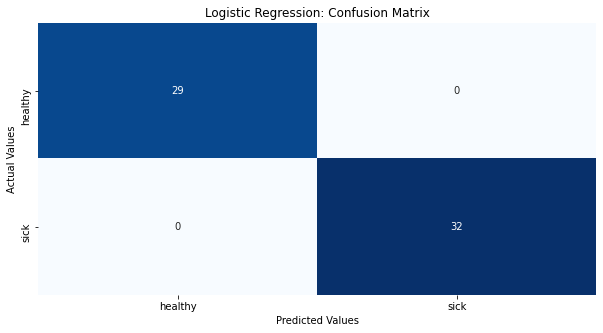

In [140]:
labels_predicted = logisticRegression.predict(features_test)
plt.subplots(figsize=(10,5))

conf_mat = confusion_matrix(labels_test, labels_predicted)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['healthy', 'sick'], yticklabels=['healthy', 'sick'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Logistic Regression: Confusion Matrix')

In [141]:
labels_predicted = logisticRegression.predict(features_test)
print(classification_report(labels_test, labels_predicted, target_names = ['healthy', 'sick']))

              precision    recall  f1-score   support

     healthy       1.00      1.00      1.00        29
        sick       1.00      1.00      1.00        32

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



### Naive Bayes

In [142]:
nb = GaussianNB()
nb.fit(features_train, labels_train)
nb.score(features_test,labels_test)

score = round(nb.score(features_test,labels_test), 3) *100

print(f"Naive Bayes accuracy is {score}%")

Naive Bayes accuracy is 100.0%


Text(0.5, 1.0, 'Naive Bayes: Confusion Matrix')

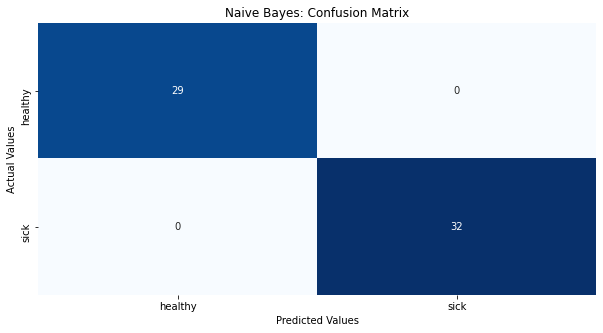

In [143]:
labels_predicted = nb.predict(features_test)
plt.subplots(figsize=(10,5))

conf_mat = confusion_matrix(labels_test, labels_predicted)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['healthy', 'sick'], yticklabels=['healthy', 'sick'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Naive Bayes: Confusion Matrix')